# Projeto ROOF IMÓVEIS - KING COUNTY - EUA

# **2 - Compreendendo os dados**

In [1]:
# Bibliotecas estudadas até o momento no curso
import pandas as pd
import numpy as np
import seaborn as sns

#import plotly.express as px
import matplotlib.pyplot as plt
#Este comando permite visualizar os gráficos do matplatolib no Jupyter sem exibir msg de alerta
%matplotlib inline

# DataSet - KC_HOUSE_DATA.CSV
### local: K:\Cursos\DEX\Projeto\DataSet\kc_house_data.csv

In [2]:
#importação do dataset em seu estado original
df_original = pd.read_csv('https://raw.githubusercontent.com/TiConsultor/roof_imoveis/main/kc_house_data.csv')


# duplicação do DataFrame para manter a cópia dos dados de origem
data = df_original

# Sobre os dados do DataSet
---
|Coluna              |Descrição do dado armazenado na coluna                                                 |Tipo do Dado |
|--------------------|---------------------------------------------------------------------------------------|-------------|
| id                 |Identificador único do imóvel                                                          |int64        |
| date               |Data da venda                                                                          |object       |
| price              |Preço de venda                                                                         |float64      |
| bedrooms           |Nº de quartos                                                                          |int64        |
| bathrooms          |Nº de banheiros, onde .5 = banheiro com vaso e sem chuveiro, .75 só chuveiro           |float64      |
| sqft_living        |Tamanho da área em ft2                                                                 |int64        |
| sqft_lot           |Tamanho do terreno em ft2                                                              |int64        |
| floors             |Nº de andares                                                                          |float64      |
| waterfront         |Indicativo se o imóvel é a beira-mar                                                   |int64        |
| view               |Grau de quão belo é a vista do imóvel (0 a 4)                                          |int64        |
| condition          |Condição da casa (1 a 5)                                                               |int64        |
| grade              |Qualidade material/design de projeto da construção, 1-3 ABAIXO, 4-10 MÉDIO, 11-13 ALTO |int64        | 
| sqft_above         |Área acima do solo em ft2                                                              |int64        |
| sqft_basmt         |Área abaixo do solo em ft2                                                             |int64        |
| yr_built           |Ano de construção                                                                      |int64        |
| yr_renov           |Ano de restauração, caso o contrário, 0                                                |int64        |
| zipcode            |Zip Code 5 - Similar ao CEP                                                            |int64        |
| lat                |Latitude                                                                               |float64      |
| long               |Longitude                                                                              |float64      |
| squft_liv15        |Média da área habitável dos 15 imóveis mais próximos em ft2                            |int64        |
| squft_lot15        |Média da área do lote dos 15 imóveis mais próximos em ft2                              |int64        |

## Checando os dados NULOS
Não foram identificados nenhum dado ausente

In [3]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Checando os tipos dos dados do DataFrame
O campo [date] precisa ter seu tipo alterado de 'object' para 'datetime64[ns]' para manipulações posteriores

In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#converter data string em datetime64
data['date'] = pd.to_datetime(data['date'])

## Gerando relatório sobre DataSet para análise preliminar dos dados

In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Checando as estatísticas básicas

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Verificando a quantidade de imóveis construídos por faixa de tempo
## A variável usada foi YR_BUILT

In [8]:
#quantidade percentual de imóveis contruídos entre 1.951 e 2.000, antes de 1.951 e depois de 2.000
mask_51_00 = (data['yr_built'] >= 1951) & (data['yr_built'] <= 2000)
mask_00_50 = (data['yr_built'] <= 1950)
mask_01_15 = (data['yr_built'] >= 2001)

qtd_1951_2000 = data['yr_built'][mask_51_00].count()
qtd_1900_1950 = data['yr_built'][mask_00_50].count()
qtd_2001_2015 = data['yr_built'][mask_01_15].count()

print(f'Imóveis contruídos entre 1.951 e 2.000: - Qtd: {qtd_1951_2000} - % do Total: {qtd_1951_2000 * 100 / len(data):.0f}%')
print(f'Imóveis contruídos entre 1.900 e 1.950  - Qtd:  {qtd_1900_1950} - % do Total: {qtd_1900_1950 * 100 / len(data):.0f}%')
print(f'imóveis contruídos entre 2.001 e 2.015  - Qtd:  {qtd_2001_2015} - % do Total: {qtd_2001_2015 * 100 / len(data):.0f}%')

Imóveis contruídos entre 1.951 e 2.000: - Qtd: 11885 - % do Total: 55%
Imóveis contruídos entre 1.900 e 1.950  - Qtd:  5187 - % do Total: 24%
imóveis contruídos entre 2.001 e 2.015  - Qtd:  4541 - % do Total: 21%


## Identificando os imóveis que foram vendidos mais de 1 vez para calcular o lucro<p>
A amostra dos imóveis que foram vendidos mais de 1 vez foi insulficiente para estabelecer um padrão de lucratividade real

In [9]:
# itendificandos os imóveis que foram vendidos mais de uma vez para estabelecer o lucro das operações de vendas
data.sort_values('date', inplace = True)
data[data.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11363,7701960990,2014-08-19,870000.0,4,2.50,3190,14565,2.0,0,0,...,11,3190,0,1990,0,98077,47.7130,-122.072,3420,20475
20054,8648900110,2014-08-26,555000.0,3,2.50,1940,3211,2.0,0,0,...,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
7846,4139420590,2014-08-27,1200000.0,4,3.50,4560,16643,1.0,0,3,...,12,2230,2330,1995,0,98006,47.5521,-122.115,4060,15177
11459,4305200070,2014-09-22,561000.0,3,2.25,1640,7200,2.0,0,0,...,8,1640,0,1985,0,98007,47.5948,-122.153,1830,8372
10258,1995200200,2014-10-08,415000.0,3,1.00,1510,6083,1.0,0,0,...,6,860,650,1940,0,98115,47.6966,-122.324,1510,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6720,5417600130,2015-05-12,301000.0,2,1.00,910,9000,1.0,0,0,...,5,910,0,1923,0,98065,47.5260,-121.810,1290,9000
2977,9136103130,2015-05-12,685000.0,2,1.50,1090,4013,1.5,0,0,...,7,1090,0,1900,0,98103,47.6652,-122.338,1390,4013
16013,5536100020,2015-05-12,1190000.0,3,2.00,2160,15788,1.0,0,0,...,8,2160,0,1951,0,98004,47.6227,-122.207,2260,9787
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0,0,...,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479


## Analisando variáveis específicas que nos chamaram à atenção

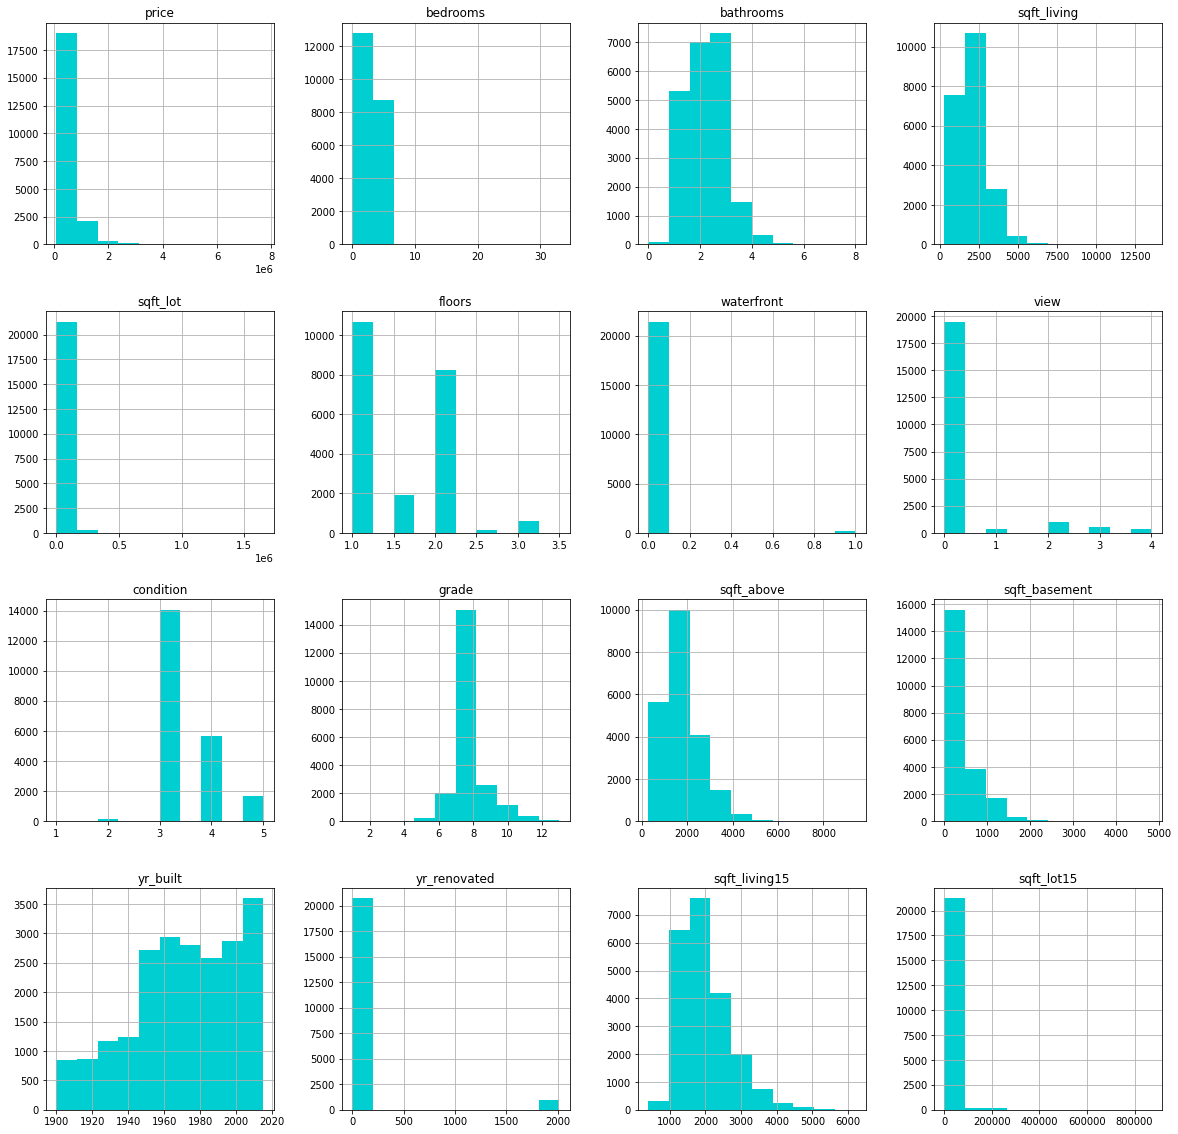

In [10]:
df_hist = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]
df_hist.hist(figsize = (20,20), color = "#00CED1", lw=0)
plt.show()

# **3 - Preparando os dados**

# Dados coletados no UNITED STATE CENSUS BUREAU<p>
https://data.census.gov/cedsci/profile?g=860XX00US98039

In [11]:
#dataset estatístico do CENSUS
df_estat = pd.read_csv('https://raw.githubusercontent.com/TiConsultor/roof_imoveis/main/estat_zip.csv', sep = ';')
census = df_estat
census.dropna(inplace=True)
census

,zipcode,renda,saude,educacao,empresas,emprego,domicilios
0,98001,88.962,"5,5","27,1",1.271,"63,2",11.648
1,98002,59.097,"9,4","17,9",1.022,"62,3",13.162
2,98003,59.560,11,"27,1",1.705,"62,8",18.515
3,98004,142.173,"2,7","75,5",3.094,"65,7",17.460
4,98005,135.225,"4,2",68,1.682,"68,4",8.590
...,...,...,...,...,...,...,...
65,98177,125.036,"3,5","67,7",377.000,"59,3",8.178
66,98178,84.820,"6,5","32,4",286.000,"66,2",9.760
67,98188,64.206,"10,6","23,1",1.485,"71,2",10.018
68,98198,66.938,11,"26,8",606.000,"60,2",14.423


## Analisando os tipos de dados obtidos no CENSUS

In [12]:
census.dtypes

zipcode         int64
renda         float64
saude          object
educacao       object
empresas      float64
emprego        object
domicilios    float64
dtype: object

## Fazendo a conversão dos dados obtidos no CENSUS

In [13]:
census['saude'] = census['saude'].str.replace(',','.')
census['educacao'] = census['educacao'].str.replace(',','.')
census['emprego'] = census['emprego'].str.replace(',','.')

census['saude'] = census['saude'].astype(float)
census['educacao'] = census['educacao'].astype(float)
census['emprego'] = census['emprego'].astype(float)

## O conjunto de dados possui as seguintes variáveis
---
|Coluna              |Descrição do dado armazenado na coluna                                                 |Tipo do Dado |
|--------------------|---------------------------------------------------------------------------------------|-------------|
| zipcode            |Código postal                                                                          |int64        |
| renda              |Renda familiar em US$ anual (mediana )                                                 |float64      |
| saude              |Percentual da população sem cobertura de plano de saúde                                |float64      |
| educacao           |Percentual da população com licenciatura e/ou nível superior                           |float64      |
| empresas           |Quantidade de empresas                                                                 |float64      |
| emprego            |Percentual da taxa de emprego                                                          |float64      |
| domicilios         |Quantidade de famílias e aranjo de vida                                                |float64      |

**OBS: Todos esses dados estão agrupados por zipcode no levantamento estatístico do CENSUS**

## Checando dados ausentes no CENSUS

In [14]:
census.isnull().sum()

zipcode       0
renda         0
saude         0
educacao      0
empresas      0
emprego       0
domicilios    0
dtype: int64

## Fazendo a junção dos dados do Kaggle.com com os dados do CENSUS

In [15]:
data = pd.merge(data, census, on = 'zipcode')

## DataSet de trabalho preparado para iniciarmos as nossas análises

In [16]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,renda,saude,educacao,empresas,emprego,domicilios
0,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,47.4635,-121.991,2340,35100,121.620,4.8,61.6,1.25,66.1,12.074
1,5561000920,2014-05-02,630000.0,4,2.75,2710,37277,2.0,0,0,...,47.4634,-121.987,2390,39299,121.620,4.8,61.6,1.25,66.1,12.074
2,1523069197,2014-05-03,379880.0,3,2.50,1650,14054,1.0,0,0,...,47.4821,-122.017,1940,87555,121.620,4.8,61.6,1.25,66.1,12.074
3,1823069155,2014-05-05,525888.0,5,1.75,2550,71874,1.0,0,0,...,47.4845,-122.080,2170,51400,121.620,4.8,61.6,1.25,66.1,12.074
4,5561301280,2014-05-05,410000.0,3,2.25,1800,36704,1.0,0,0,...,47.4688,-122.013,2730,36404,121.620,4.8,61.6,1.25,66.1,12.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3262300322,2015-04-08,1651000.0,4,3.25,3640,13530,1.0,0,0,...,47.6293,-122.238,2760,15000,185.163,0.7,80.8,75.00,52.5,1.213
21609,3262300920,2015-04-08,1200000.0,4,3.00,2150,8119,2.0,0,0,...,47.6335,-122.236,1590,8119,185.163,0.7,80.8,75.00,52.5,1.213
21610,2260300060,2015-04-10,2575000.0,5,3.00,4780,20440,1.0,0,0,...,47.6242,-122.239,4660,20440,185.163,0.7,80.8,75.00,52.5,1.213
21611,3262300485,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,0,...,47.6295,-122.236,3410,16236,185.163,0.7,80.8,75.00,52.5,1.213


## Pre-processamento dos dados

## 3.1 - Alterando o tipo de dados das colunas / Criando novas colunas

## Criando novas colunas para melhorar as nossas análises
Utilizamos a biblioteca [uszipcode] que tem acesso à base de dados CENSUS e extraímos alguns dados oficiais além dos já obtivos anteriormente

In [17]:
from uszipcode import SearchEngine
localiza = SearchEngine() # instanciando o mecanismo de busca na base de dados CENSUS

# Calculando a idade do imóvel e armazenando na coluna [idade_imovel], tendo por base apenas o ano e como referência o ano de 2022
data['idade_imovel'] = 2022 - data['yr_built']

# Criando as colunas [tipo_cod] e [tipo_desc] para armazenar o código e tipo do imóvel, sendo 1 = 'studio', 2 = 'apartment' e 3 = 'house'
data['tipo_cod'] = data['bedrooms'].apply(lambda x: 1         if x == 1 else 2           if x == 2 else 3)
data['tipo_desc'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartment' if x == 2 else 'house')
data['tipo_desc'] = data['tipo_desc'].astype('string')

# criando coluna para receber o valor do ft2 de sqft_living
data['price_sqft_liv_ft2'] = data['price'] / data['sqft_living']

# criando coluna para receber o valor do ft2 de sqft_lot
data['price_sqft_lot_ft2'] = data['price'] / data['sqft_lot']

# criando coluna para medir a relação entre o tamanho da área construída e do lote em comparação aos 15 imóveis +próximos
data['sqft_liv_perc_prox'] = data['sqft_living'] * 100 / data['sqft_living15'] 
data['sqft_lot_perc_prox'] = data['sqft_lot'] * 100 / data['sqft_lot15'] 

# criando a coluna cidades e povoando com base no zipcode
def cidade(x):
	return localiza.by_zipcode(int(x)).city
data['cidade'] = data['zipcode'].fillna(0).astype(int).apply(cidade)
data['cidade'] = data['cidade'].astype('string')

# criando a coluna area_terra e povoando com base no zipcode
def area_terra(x):
	return localiza.by_zipcode(int(x)).land_area_in_sqmi * 2.58999
data['area_terra'] = data['zipcode'].fillna(0).astype(int).apply(area_terra)

# criando a coluna area_agua e povoando com base no zipcode
def area_agua(x):
	return localiza.by_zipcode(int(x)).water_area_in_sqmi * 2.58999
data['area_agua'] = data['zipcode'].fillna(0).astype(int).apply(area_agua)

# criando a coluna qtd_imoveis e povoando com base no zipcode
def qtd_imoveis(x):
	return localiza.by_zipcode(int(x)).housing_units
data['qtd_imoveis'] = data['zipcode'].fillna(0).astype(int).apply(qtd_imoveis)

# ajustando as casas decimais
data['area_terra'] = data['area_terra'].round(2)
data['area_agua'] = data['area_agua'].round(2)
data['sqft_liv_perc_prox'] = data['sqft_liv_perc_prox'].round(2)
data['sqft_lot_perc_prox'] = data['sqft_lot_perc_prox'].round(2)

c:\Users\ticon\.conda\envs\dex\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Após a criação das novas colunas:
# DataSet - Tipos de dados/novas colunas p/abstrair valores significativos à análise
---
|Coluna              |Descrição do dado **DATASET FINALIZADO**                                               |Tipo do Dado |
|--------------------|---------------------------------------------------------------------------------------|-------------|
| id                 |Identificador único do imóvel                                                          |int64        |
| date               |Data da venda                                                                          |datetime64   |
| price              |Preço de venda                                                                         |float64      |
| bedrooms           |Nº de quartos                                                                          |int64        |
| bathrooms          |Atribuí peso 100 à variável, ficando "discreta" para não atrapalhar o modelo escolhido |float64      |
| sqft_living        |Tamanho da área em ft2                                                                 |int64        |
| sqft_lot           |Tamanho do terreno em ft2                                                              |int64        |
| floors             |Nº de andares                                                                          |float64      |
| waterfront         |Indicativo se o imóvel é a beira-mar, 0 = não / 1 = sim                                |int64        |
| view               |Grau de quão belo é a vista do imóvel (0 a 4)                                          |int64        |
| condition          |Condição da casa (1 a 5)                                                               |int64        |
| grade              |Qualidade material/design de projeto da construção, 1-3 ABAIXO, 4-10 MÉDIO, 11-13 ALTO |int64        | 
| sqft_above         |Área acima do solo em ft2                                                              |int64        |
| sqft_basement      |Área abaixo do solo em ft2                                                             |int64        |
| yr_built           |Ano de construção                                                                      |int64        |
| yr_renovated       |Ano de restauração, caso o contrário, 0                                                |int64        |
| zipcode            |Zip Code 5 - Similar ao CEP                                                            |int64        |
| lat                |Latitude                                                                               |float64      |
| long               |Longitude                                                                              |float64      |
| sqft_liv15         |Quantidade da área habitável dos 15 imóveis mais próximos em ft2 (pé quadrado)         |int64        |
| sqft_lot15         |Quantidade da área do lote dos 15 imóveis mais próximos em ft2 (pé quadrado)           |int64        |
| renda              |Renda familiar em US$ anual (mediana )                                                 |float64      |
| saude              |Percentual da população sem cobertura de plano de saúde                                |float64      |
| educacao           |Percentual da população com licenciatura e/ou nível superior                           |float64      |
| empresas           |Quantidade de empresas                                                                 |float64      |
| emprego            |Percentual da taxa de emprego                                                          |float64      |
| domicilios         |Quantidade de famílias e aranjo de vida                                                |float64      |
| idade_imovel       |Quantos anos de construído tem o imóvel                                                |int64        |
| tipo_cod           |Código do tipo do imóvel, sendo 1 = studio, 2 = apartment, 3 = house                   |int64        |
| tipo_desc          |Descrição do tipo do imóvel, sendo studio, apartment e house                           |string       |
| price_sqft_liv_ft2 |Preço por ft2 da área construída                                                       |float64      |
| price_sqft_lot_ft2 |Preço por ft2 do lote                                                                  |float64      |
| sqft_liv_med_prox  |Percentual do tamanho da área construída em relação aos 15 imóveis mais próximos       |float64      |
| sqft_lot_med_prox  |Percentual do tamanho do lote em relação aos 15 imóveis mais próximos                  |float64      |
| cidade             |Cidade onde o imóvel está localizado                                                   |string       |
| area_terra         |Área de terra em KM quadrados (área do zipcode)                                        |float64      |
| area_agua          |Área de água em KM quadrados (área do zipcode)                                         |float64      |
| qtd_imoveis        |Quantidade de imóveis na área do zipcode                                               |int64        | 

## Exclusão dos imóveis que foram vendidos mais de uma vez, permanecendo apenas a venda mais recente

In [18]:
# exclusão direta dos imóveis duplicados, deixando no DataSet apenas o registro mais recente
data.sort_values('date', inplace = True)
data.drop_duplicates(subset=['id'], inplace = True, keep='last') 

In [19]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,tipo_cod,tipo_desc,price_sqft_liv_ft2,price_sqft_lot_ft2,sqft_liv_perc_prox,sqft_lot_perc_prox,cidade,area_terra,area_agua,qtd_imoveis
0,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,3,house,222.081218,12.464387,84.19,100.00,Issaquah,144.50,2.93,11248
11288,1525079056,2014-05-02,284000.0,3,1.75,1800,23103,1.0,0,0,...,3,house,157.777778,12.292776,127.66,127.20,Carnation,117.35,4.64,2631
11412,2493200195,2014-05-02,615000.0,3,1.75,2360,7291,1.0,0,0,...,3,house,260.593220,84.350569,126.88,132.59,Seattle,5.96,2.18,7533
4510,5101405331,2014-05-02,495000.0,4,1.75,1600,6380,1.0,0,0,...,3,house,309.375000,77.586207,146.79,100.00,Seattle,13.96,3.99,18677
11675,587550340,2014-05-02,604000.0,3,2.50,3240,33151,2.0,0,2,...,3,house,186.419753,18.219662,80.00,132.78,Federal Way,26.73,3.60,18026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,2,apartment,262.043796,314.912281,100.00,104.59,Seattle,18.39,0.18,21903
13195,1786200010,2015-05-14,456500.0,4,2.50,2580,11780,2.0,0,0,...,3,house,176.937984,38.752122,107.05,140.19,Maple Valley,172.21,1.01,11387
9749,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,3,house,240.641711,61.274510,100.00,96.00,Bellevue,11.34,0.03,10996
6286,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,2,apartment,320.503597,66.791604,151.09,104.55,Seattle,17.04,5.46,21623


In [20]:
#analisandos os imóveis agrupando-os por cidade de forma ordenada, para visualar a sua distribuição
data.cidade.value_counts()

Seattle          8889
Renton           1580
Bellevue         1395
Kent             1195
Kirkland          974
Redmond           973
Auburn            907
Sammamish         793
Federal Way       768
Issaquah          731
Maple Valley      587
Woodinville       468
Snoqualmie        307
Kenmore           282
Mercer Island     282
Enumclaw          234
North Bend        219
Bothell           194
Duvall            190
Carnation         123
Vashon            117
Black Diamond      99
Fall City          80
Medina             49
Name: cidade, dtype: Int64

## Vamos criar um novo DataSet que atenda aos critérios básicos da Roof Imóveis, analisando o tipo, a idade e a quantidade de quartos do imóvel

In [21]:
# com base nos critérios estabelecidos pelo cliente, temos um novo conjunto de dados reduzidos para uma análise mais refinada
sel_cli = data.loc[(data['bedrooms'] >= 3) & (data['bedrooms'] <= 4) & (data['idade_imovel'] <= 15) & (data['tipo_cod'] <= 3)]
sel_cli

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,tipo_cod,tipo_desc,price_sqft_liv_ft2,price_sqft_lot_ft2,sqft_liv_perc_prox,sqft_lot_perc_prox,cidade,area_terra,area_agua,qtd_imoveis
13196,9267200226,2014-05-02,436110.0,3,2.50,1770,1235,3.0,0,0,...,3,house,246.389831,353.125506,105.36,102.66,Seattle,12.02,1.71,24128
5388,2771102144,2014-05-02,385000.0,3,3.25,1320,1327,2.0,0,0,...,3,house,291.666667,290.128109,91.67,105.07,Seattle,10.83,3.88,9810
1286,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,3,house,167.673716,85.384615,139.08,130.00,Snoqualmie,191.89,2.25,4556
4921,123059127,2014-05-02,625000.0,4,3.25,2730,54014,1.0,0,0,...,3,house,228.937729,11.571074,100.00,48.54,Renton,51.75,0.16,13004
9159,8564860280,2014-05-02,459990.0,3,2.50,2680,5539,2.0,0,0,...,3,house,171.638060,83.045676,89.63,91.75,North Bend,872.80,15.64,5536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,9526600340,2015-05-12,729000.0,3,2.50,2440,4244,2.0,0,0,...,3,house,298.770492,171.771913,90.71,93.15,Redmond,52.06,2.15,25674
12172,2867300170,2015-05-13,498000.0,4,2.50,3402,14355,2.0,0,0,...,3,house,146.384480,34.691745,100.00,169.14,Federal Way,26.73,3.60,18026
18869,5634500234,2015-05-13,554990.0,3,2.50,2100,6092,2.0,0,0,...,3,house,264.280952,91.101445,93.33,70.90,Kenmore,14.66,1.86,8566
14423,642800130,2015-05-13,724500.0,3,3.25,3240,4185,2.0,0,0,...,3,house,223.611111,173.118280,121.80,89.19,Sammamish,24.55,4.22,7005


## Nova análise já com o DataSet atendendo as especificações do cliente

In [22]:
#analisandos os imóveis agrupando-os por cidade de forma ordenada, para visualar a sua distribuição
sel_cli.cidade.value_counts()

Seattle          677
Renton           144
Auburn           119
Issaquah         110
Kent             105
Redmond           96
Maple Valley      87
Snoqualmie        66
Kirkland          54
Sammamish         47
Bellevue          40
Kenmore           28
Federal Way       27
Duvall            24
North Bend        21
Enumclaw          15
Woodinville       11
Bothell           11
Carnation          8
Mercer Island      7
Black Diamond      7
Fall City          3
Vashon             2
Medina             1
Name: cidade, dtype: Int64

# Limpeza dos dados

Observa-se que por não ter dados ausentes e após aplicar os critérios estipulados pelo cliente o nosso DataSet [sel_cli] já se encontra totalmente limpo

## **Análise para desenvolver INSIGHTS significativos**

Em virtude da sensibilidade do negócio, não é suficiente a análise apenas do imóvel sem levar em consideração a sua localização, sendo assim
vamos agrupar as localizações dos imóveis selecionados até aqui para que possamos estabelecer melhores crítérios.

In [23]:
# agregação macro para escolher a área
sel_cli_agrupado = sel_cli.groupby(['zipcode']).agg(
    preco_imov         = pd.NamedAgg(column = 'price',                  aggfunc = 'mean'),
    area_ft2           = pd.NamedAgg(column = 'sqft_living15',          aggfunc = 'mean'),
    idade_max          = pd.NamedAgg(column = 'idade_imovel',           aggfunc = 'max'),
    idade_min          = pd.NamedAgg(column = 'idade_imovel',           aggfunc = 'min'),
    preco_liv_ft2      = pd.NamedAgg(column = 'price_sqft_liv_ft2',     aggfunc = 'mean'),
    preco_lot_ft2      = pd.NamedAgg(column = 'price_sqft_lot_ft2',     aggfunc = 'mean'),
    lat_med            = pd.NamedAgg(column = 'lat',                    aggfunc = 'mean'),
    long_med           = pd.NamedAgg(column = 'long',                   aggfunc = 'mean'),
    renda              = pd.NamedAgg(column = 'renda',                  aggfunc = 'mean'),
    saude              = pd.NamedAgg(column = 'saude',                  aggfunc = 'mean'),
    educacao           = pd.NamedAgg(column = 'educacao',               aggfunc = 'mean'),
    empresas           = pd.NamedAgg(column = 'empresas',               aggfunc = 'mean'),
    emprego            = pd.NamedAgg(column = 'emprego',                aggfunc = 'mean'),
    domicilios         = pd.NamedAgg(column = 'domicilios',             aggfunc = 'mean'))

In [24]:
sel_cli_agrupado

,preco_imov,area_ft2,idade_max,idade_min,preco_liv_ft2,preco_lot_ft2,lat_med,long_med,renda,saude,educacao,empresas,emprego,domicilios
zipcode,,,,,,,,,,,,,,
98001,3.465339e+05,2184.723404,15,8,146.595139,58.807862,47.298874,-122.267936,88.962,5.5,27.1,1.271,63.2,11.648
98002,2.820865e+05,1989.692308,15,8,152.412478,78.365996,47.346362,-122.212654,59.097,9.4,17.9,1.022,62.3,13.162
98003,4.427464e+05,2404.428571,14,8,154.253397,75.751965,47.305057,-122.268143,59.560,11.0,27.1,1.705,62.8,18.515
98004,1.712912e+06,2220.000000,15,8,456.408199,239.581784,47.615825,-122.202542,142.173,2.7,75.5,3.094,65.7,17.460
98005,9.750000e+05,3200.000000,11,11,311.501597,18.634609,47.593200,-122.159000,135.225,4.2,68.0,1.682,68.4,8.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,7.008750e+05,1820.000000,15,8,264.585910,179.476885,47.723312,-122.364250,125.036,3.5,67.7,377.000,59.3,8.178
98178,4.374000e+05,1908.000000,15,8,172.616595,106.925152,47.494280,-122.248200,84.820,6.5,32.4,286.000,66.2,9.760
98188,4.474500e+05,1825.000000,15,8,143.322492,49.131411,47.443667,-122.284167,64.206,10.6,23.1,1.485,71.2,10.018


## Uma vez agrupa as áreas, vamos optar pela escolha onde o nível educacional seja igual ou superior a 75% em relação ao DataSet

In [25]:
# após aplicar o criterio de seleção EDUCAÇÃO >= 75% da população temos um novo dataframe com as cidades selecionadas
sel_cli_agr_75 = sel_cli_agrupado.loc[(sel_cli_agrupado['educacao'] >= 75)]

In [26]:
sel_cli_agr_75

,preco_imov,area_ft2,idade_max,idade_min,preco_liv_ft2,preco_lot_ft2,lat_med,long_med,renda,saude,educacao,empresas,emprego,domicilios
zipcode,,,,,,,,,,,,,,
98004,1.712912e+06,2220.000000,15,8,456.408199,239.581784,47.615825,-122.202542,142.173,2.70,75.5,3.094,65.7,17.460
98039,4.000000e+06,3140.000000,14,14,564.971751,241.356423,47.615100,-122.224000,185.163,0.70,80.8,75.000,52.5,1.213
98040,1.683455e+06,2800.000000,15,7,408.154681,133.169959,47.566529,-122.223286,150.506,2.06,76.2,841.000,61.2,10.128
98074,8.592886e+05,3321.904762,15,8,253.015357,120.682216,47.610562,-122.054810,196.146,2.90,78.9,465.000,67.0,9.567
98102,8.776875e+05,1753.750000,15,8,472.971142,511.815260,47.635750,-122.325500,97.374,3.60,78.4,841.000,82.1,16.219
98103,6.029923e+05,1469.619048,15,7,342.843598,355.745461,47.677399,-122.345274,105.480,3.70,75.2,1.972,77.4,26.314
98105,6.717311e+05,1561.000000,15,8,406.067108,395.248407,47.663285,-122.309769,67.449,5.20,75.2,1.340,56.9,17.332
98112,1.237748e+06,1996.000000,15,7,464.868783,427.473088,47.627000,-122.294050,122.388,1.50,82.1,709.000,67.6,11.846
98115,7.001403e+05,1525.800000,15,7,342.920722,317.919028,47.687480,-122.309720,117.038,2.20,75.6,1.278,72.9,23.430


## Visualizando as áreas selecionadas para checagem

In [27]:
# importando a biblioteca folium
import folium as fl

# mapa com coordenada definida e zoom definido
mapa = fl.Map(location=[47.62569796, -122.2334898], zoom_start=11)

cor = 'darkpurple'
'''
['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen', 'darkpurple', 'black']
'''
fl.Marker([47.62569796, -122.2334898], popup = '98039', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.61606857, -122.2051397], popup = '98004', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.62963022, -122.2978731], popup = '98112', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.63459135, -122.3222500], popup = '98102', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.66506681, -122.2943406], popup = '98105', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.55984610, -122.2255922], popup = '98040', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.67604942, -122.3441436], popup = '98103', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.68549392, -122.3017448], popup = '98115', icon = fl.Icon(color = cor)).add_to(mapa)
fl.Marker([47.62396989, -122.0446184], popup = '98074', icon = fl.Icon(color = cor)).add_to(mapa)

mapa


## Verificando as cidades que foram selecionadas

In [28]:
area_cidade = data.loc[(data['zipcode'] == 98039) | 
                       (data['zipcode'] == 98004) |
                       (data['zipcode'] == 98112) |
                       (data['zipcode'] == 98102) |
                       (data['zipcode'] == 98105) |
                       (data['zipcode'] == 98040) |
                       (data['zipcode'] == 98103) |
                       (data['zipcode'] == 98115) |
                       (data['zipcode'] == 98074)]
area_cidade.cidade.value_counts()                       

Seattle          1778
Sammamish         435
Bellevue          315
Mercer Island     282
Medina             49
Name: cidade, dtype: Int64

## Voltemos ao nosso DataSet finalizado para selecionar os imóveis que atende aos critérios do cliente para as nossas considerações finais, porém, vamos estabelecer um novo critério, dessa vez acrescentaremos a qualidade do design/material do imóvel, nível de qualidade mínima >= 10

In [29]:
resumo = data.loc[(data['bedrooms'] >= 3) & 
                  (data['bedrooms'] <= 4) & 
                  (data['idade_imovel'] <= 15) & 
                  (data['tipo_cod'] <= 3) &
                  (data['educacao'] >= 75) &
                  (data['grade'] >= 10) &
                  ((data['zipcode'] == 98039) |
                  (data['zipcode'] == 98004) |
                  (data['zipcode'] == 98112) |
                  (data['zipcode'] == 98102) |
                  (data['zipcode'] == 98105) |
                  (data['zipcode'] == 98040) |
                  (data['zipcode'] == 98103) |
                  (data['zipcode'] == 98115) |
                  (data['zipcode'] == 98074))]

In [30]:
resumo.grade.value_counts()

10    28
11    13
12     1
Name: grade, dtype: int64

In [31]:
resumo

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,tipo_cod,tipo_desc,price_sqft_liv_ft2,price_sqft_lot_ft2,sqft_liv_perc_prox,sqft_lot_perc_prox,cidade,area_terra,area_agua,qtd_imoveis
19068,3623500205,2014-05-13,2450000.0,4,4.50,5030,11023,2.0,0,2,...,3,house,487.077535,222.262542,138.19,95.94,Mercer Island,16.37,17.59,9930
9765,7430200100,2014-05-14,1222500.0,4,3.50,4910,9444,1.5,0,0,...,3,house,248.981670,129.447268,107.68,85.37,Sammamish,27.66,4.01,8942
16368,3225059223,2014-05-19,1405000.0,4,3.50,3410,10769,2.0,0,0,...,3,house,412.023460,130.467081,128.68,107.07,Bellevue,18.21,4.17,16568
16371,5710000005,2014-05-22,2150000.0,4,5.50,5060,10320,2.0,0,0,...,3,house,424.901186,208.333333,168.11,102.38,Bellevue,18.21,4.17,16568
13292,9468200109,2014-06-17,1555000.0,3,3.50,4360,6240,2.0,0,3,...,3,house,356.651376,249.198718,227.08,159.59,Seattle,12.02,1.71,24128
9819,2895730070,2014-06-20,925000.0,4,2.75,3730,8014,2.0,0,0,...,3,house,247.989276,115.423010,101.63,96.80,Sammamish,27.66,4.01,8942
19121,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,3,house,167.318207,72.403152,160.09,82.50,Mercer Island,16.37,17.59,9930
16412,9533100285,2014-06-30,2065000.0,4,3.75,4350,7965,2.0,0,0,...,3,house,474.712644,259.259259,198.63,93.08,Bellevue,18.21,4.17,16568
16143,1338801019,2014-07-01,1198000.0,4,3.50,3400,3850,2.5,0,0,...,3,house,352.352941,311.168831,167.49,96.25,Seattle,8.18,3.83,10897
19134,2154970020,2014-07-03,2351960.0,4,4.25,5010,19412,2.0,0,1,...,3,house,469.453094,121.160107,131.15,113.76,Mercer Island,16.37,17.59,9930


## Verificando os preços em conjunto com as demais condições dos imóveis

In [32]:
# ordenando os imóveis pelo preço histórico e buscando os 5 primeiros imóveis
sel_top_five = resumo.sort_values(by = ['price'], ascending=True).reset_index()

## **Seleção dos imóveis indicados para investimento**

In [33]:
sel_top_five.head(5)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,tipo_cod,tipo_desc,price_sqft_liv_ft2,price_sqft_lot_ft2,sqft_liv_perc_prox,sqft_lot_perc_prox,cidade,area_terra,area_agua,qtd_imoveis
0,19121,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,...,3,house,167.318207,72.403152,160.09,82.50,Mercer Island,16.37,17.59,9930
1,10049,1853080730,2014-12-10,835000.0,3,2.50,2960,6856,2.0,0,...,3,house,282.094595,121.791132,89.16,100.00,Sammamish,27.66,4.01,8942
2,10187,6453550090,2015-05-05,861111.0,4,2.50,3650,7090,2.0,0,...,3,house,235.920822,121.454302,94.56,97.50,Sammamish,27.66,4.01,8942
3,9819,2895730070,2014-06-20,925000.0,4,2.75,3730,8014,2.0,0,...,3,house,247.989276,115.423010,101.63,96.80,Sammamish,27.66,4.01,8942
4,5905,5101402618,2014-08-20,935000.0,4,3.00,3680,7105,2.0,0,...,3,house,254.076087,131.597467,232.91,104.26,Seattle,17.04,5.46,21623


In [38]:
# mapa que identifica os imóveis TOP FIVE, os quais foram selecionados para o investimento
mapa_top_five = fl.Map(location=[47.7017, -122.023], zoom_start=11)

cor_top_five = 'darkblue'

fl.Marker([47.5784, -122.226], icon = fl.Icon(color = cor_top_five)).add_to(mapa_top_five)
fl.Marker([47.5906, -122.057], icon = fl.Icon(color = cor_top_five)).add_to(mapa_top_five)
fl.Marker([47.6060, -122.052], icon = fl.Icon(color = cor_top_five)).add_to(mapa_top_five)
fl.Marker([47.6036, -122.059], icon = fl.Icon(color = cor_top_five)).add_to(mapa_top_five)
fl.Marker([47.6956, -122.311], icon = fl.Icon(color = cor_top_five)).add_to(mapa_top_five)

mapa_top_five  

## **Seleção dos imóveis NÃO INDICADOS PARA INVESTIMENTO**

In [34]:
# ordenando os imóveis pelo preço histórico e buscando os 5 primeiros imóveis
sel_not_top_five = data.sort_values(by = ['educacao'], ascending=True).reset_index()

In [40]:
sel_not_top_five.head(5)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,tipo_cod,tipo_desc,price_sqft_liv_ft2,price_sqft_lot_ft2,sqft_liv_perc_prox,sqft_lot_perc_prox,cidade,area_terra,area_agua,qtd_imoveis
0,21527,1921059310,2015-03-20,193000.0,2,1.75,1280,6774,1.0,0,...,2,apartment,150.781250,28.491290,88.28,86.73,Auburn,18.52,0.34,13480
1,21397,2597500840,2014-07-07,209950.0,3,1.50,1180,7300,1.0,0,...,3,house,177.923729,28.760274,58.13,86.66,Auburn,18.52,0.34,13480
2,21398,2891000450,2014-07-07,229500.0,3,1.00,1230,6000,1.0,0,...,3,house,186.585366,38.250000,99.19,100.00,Auburn,18.52,0.34,13480
3,21366,7116500920,2014-05-20,300000.0,6,5.25,2860,5682,2.0,0,...,3,house,104.895105,52.798310,205.76,95.40,Auburn,18.52,0.34,13480
4,21367,7116500925,2014-05-20,206000.0,4,2.00,1700,6025,1.0,0,...,3,house,121.176471,34.190871,128.79,101.16,Auburn,18.52,0.34,13480


In [39]:
#  mapa que identifica os imóveis NOT TOP FIVE, os quais NÃO foram selecionados para o investimento
mapa3 = fl.Map(location=[47.3256, -122.209], zoom_start=11)

cor_top_five = 'darkblue'
cor_not_five = 'darkred'

fl.Marker([47.2925, -122.219], icon = fl.Icon(color = cor_not_five)).add_to(mapa3)
fl.Marker([47.2857, -122.197], icon = fl.Icon(color = cor_not_five)).add_to(mapa3)
fl.Marker([47.3256, -122.209], icon = fl.Icon(color = cor_not_five)).add_to(mapa3)
fl.Marker([47.3030, -122.220], icon = fl.Icon(color = cor_not_five)).add_to(mapa3)
fl.Marker([47.3029, -122.221], icon = fl.Icon(color = cor_not_five)).add_to(mapa3)

mapa3 